In [10]:
print("\033[1m   Data Type\033[0m")                                          #assign answer number
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
# Load the dataset
file_path = r"C:\Users\Isaac\Desktop\AAI 550\Final Project\Car-Dataset.xlsx"
df = pd.read_excel(file_path)
# Select only the desired columns
columns_to_include = ['Year', 'Engine_Size', 'Transmission', 'Mileage', 'Price']
df_filtered = df[columns_to_include]
# Get the column summary
column_info = pd.DataFrame({
    "Column Name": df_filtered.columns,
    "Non-Null Count": df_filtered.notnull().sum(),
    "Data Type": df_filtered.dtypes
})
# Print in a tabular format
print("DataFrame Structure:")
print(tabulate(column_info, headers='keys', tablefmt='pretty', showindex=False))
  

   Data Type
DataFrame Structure:
+--------------+----------------+-----------+
| Column Name  | Non-Null Count | Data Type |
+--------------+----------------+-----------+
|     Year     |     10000      |   int64   |
| Engine_Size  |     10000      |  float64  |
| Transmission |     10000      |  object   |
|   Mileage    |     10000      |   int64   |
|    Price     |     10000      |   int64   |
+--------------+----------------+-----------+


In [18]:
print("\033[1m   Descriptive Statistics\033[0m")                                          #assign answer number
import pandas as pd
from tabulate import tabulate
# Load dataset
file_path = r"C:\Users\Isaac\Desktop\AAI 550\Final Project\Car-Dataset.xlsx"
df = pd.read_excel(file_path)
# Convert 'Transmission' to numerical format (0: Automatic, 1: Manual, 2: Semi-Automatic)
df['Transmission'] = df['Transmission'].replace({'Automatic': 2, 'Manual': 0, 'Semi-Automatic': 1})
selected_columns = ['Year', 'Engine_Size', 'Transmission', 'Mileage', 'Price']
df_filtered = df[selected_columns].dropna()
# Convert columns to numeric
df_filtered['Year'] = pd.to_numeric(df_filtered['Year'], errors='coerce')
df_filtered['Engine_Size'] = pd.to_numeric(df_filtered['Engine_Size'], errors='coerce')
df_filtered['Transmission'] = pd.to_numeric(df_filtered['Transmission'], errors='coerce')
df_filtered['Mileage'] = pd.to_numeric(df_filtered['Mileage'], errors='coerce')
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
# Remove rows with null values
df_filtered = df_filtered.dropna()
# Calculate descriptive statistics
descriptive_stats = df_filtered.describe().T
# Calculate the mode
mode = df_filtered.mode().iloc[0]
# Add the mode
descriptive_stats['mode'] = mode
# Reorder columns
descriptive_stats = descriptive_stats[['mean', '50%', 'mode', 'min', 'max', 'std']]
# Rename '50%' to 'median' for clarity
descriptive_stats.rename(columns={'50%': 'median'}, inplace=True)
# Add the sample size row
sample_size = pd.DataFrame([[df_filtered.shape[0]] * len(descriptive_stats.columns)], columns=descriptive_stats.columns, index=['sample_size'])
descriptive_stats = pd.concat([descriptive_stats, sample_size])
# Round to 2 decimal places
descriptive_stats = descriptive_stats.round(2)
# Print the statistics in tabular format 
print(tabulate(descriptive_stats, headers='keys', tablefmt='pretty'))


   Descriptive Statistics
+--------------+-----------+----------+---------+---------+----------+----------+
|              |   mean    |  median  |  mode   |   min   |   max    |   std    |
+--------------+-----------+----------+---------+---------+----------+----------+
|     Year     |  2011.54  |  2012.0  | 2002.0  | 2000.0  |  2023.0  |   6.9    |
| Engine_Size  |    3.0    |   3.0    |   3.7   |   1.0   |   5.0    |   1.15   |
| Transmission |   0.99    |   1.0    |   0.0   |   0.0   |   2.0    |   0.82   |
|   Mileage    | 149239.11 | 149587.0 | 12478.0 |  25.0   | 299947.0 | 86322.35 |
|    Price     |  8852.96  |  8858.5  | 2000.0  | 2000.0  | 18301.0  |  3112.6  |
| sample_size  |  10000.0  | 10000.0  | 10000.0 | 10000.0 | 10000.0  | 10000.0  |
+--------------+-----------+----------+---------+---------+----------+----------+


   Histogram


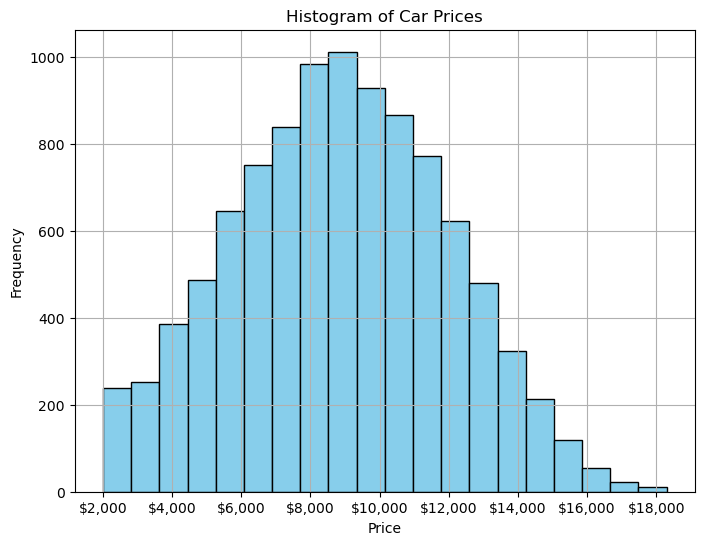

In [20]:
print("\033[1m   Histogram\033[0m")                                          #assign answer number
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
# Load dataset
file_path = r"C:\Users\Isaac\Desktop\AAI 550\Final Project\Car-Dataset.xlsx"
df = pd.read_excel(file_path)
pd.set_option('future.no_silent_downcasting', True)
                                                                                    # Convert columns to numeric
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
                                                                                    # Remove Missing Values
df_filtered = df_filtered.dropna()
                                                                                    # Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['Price'], bins=20, color='skyblue', edgecolor='black')
                                                                                    # Format the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
                                                                                    # Title and labels
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
                                                                                     # Show plot
plt.grid(True)
plt.show()


In [23]:
print("\033[1m   Correlaion\033[0m")                                          #assign answer number
import pandas as pd
from tabulate import tabulate
                                                                                    # Load dataset
file_path = r"C:\Users\Isaac\Desktop\AAI 550\Final Project\Car-Dataset.xlsx"
df = pd.read_excel(file_path)
# Convert 'Transmission' to numerical format (0: Automatic, 1: Manual, 2: Semi-Automatic)
df['Transmission'] = df['Transmission'].replace({'Automatic': 2, 'Manual': 0, 'Semi-Automatic': 1})
# Remove rows with missing data
selected_columns = ['Year', 'Engine_Size', 'Transmission', 'Mileage', 'Price']
df_filtered = df[selected_columns].dropna()                             
correlation_matrix = df_filtered.corr().round(2)
# Convert the correlation matrix to a tabulated format
table = tabulate(correlation_matrix, headers=correlation_matrix.columns, tablefmt="grid")
# Print table
print(table)


   Correlaion
+--------------+--------+---------------+----------------+-----------+---------+
|              |   Year |   Engine_Size |   Transmission |   Mileage |   Price |
+==============+========+===============+================+===========+=========+
| Year         |   1    |         -0    |           0.01 |     -0    |    0.66 |
+--------------+--------+---------------+----------------+-----------+---------+
| Engine_Size  |  -0    |          1    |           0    |      0.02 |    0.36 |
+--------------+--------+---------------+----------------+-----------+---------+
| Transmission |   0.01 |          0    |           1    |     -0.01 |    0.21 |
+--------------+--------+---------------+----------------+-----------+---------+
| Mileage      |  -0    |          0.02 |          -0.01 |      1    |   -0.55 |
+--------------+--------+---------------+----------------+-----------+---------+
| Price        |   0.66 |          0.36 |           0.21 |     -0.55 |    1    |
+-------------

   Scatter Plot


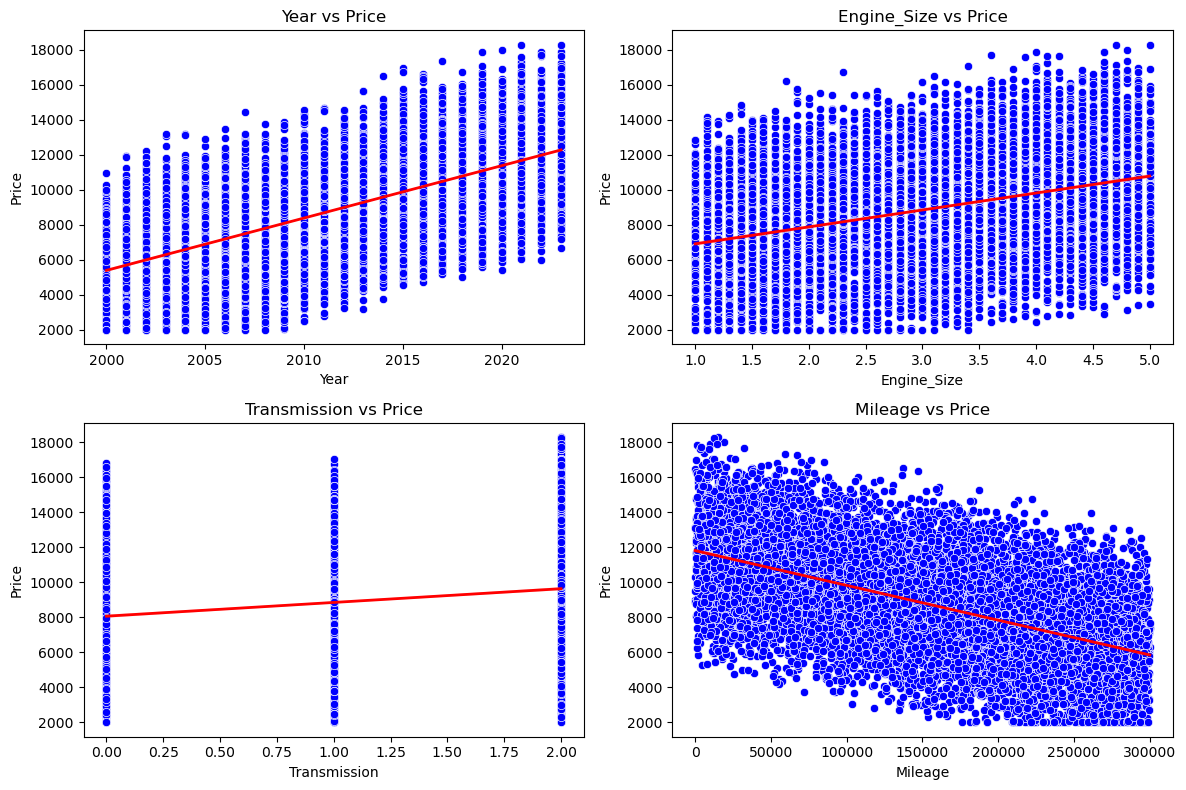

In [26]:
print("\033[1m   Scatter Plot\033[0m")                                          #assign answer number
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = r"C:\Users\Isaac\Desktop\AAI 550\Final Project\Car-Dataset.xlsx"
df = pd.read_excel(file_path)
# Convert 'Transmission' to numerical format (0: Automatic, 1: Manual, 2: Semi-Automatic)
df['Transmission'] = df['Transmission'].replace({'Automatic': 2, 'Manual': 0, 'Semi-Automatic': 1})
# Filter out rows with missing data
selected_columns = ['Year', 'Engine_Size', 'Transmission', 'Mileage', 'Price']
df_filtered = df[selected_columns].dropna()
# Convert columns to numeric
df_filtered['Year'] = pd.to_numeric(df_filtered['Year'], errors='coerce')
df_filtered['Engine_Size'] = pd.to_numeric(df_filtered['Engine_Size'], errors='coerce')
df_filtered['Transmission'] = pd.to_numeric(df_filtered['Transmission'], errors='coerce')
df_filtered['Mileage'] = pd.to_numeric(df_filtered['Mileage'], errors='coerce')
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
# Drop any rows with Null values
df_filtered = df_filtered.dropna()
# Define independent variables (X) and dependent variable (y)
X = df_filtered[['Year', 'Engine_Size', 'Transmission', 'Mileage']]
y = df_filtered['Price']
# Add a constant to the independent variables matrix
X = sm.add_constant(X)
# Run the regression model
model = sm.OLS(y, X).fit()
# Get p-values
p_values = model.pvalues
# Variables p-value less than 0.05
significant_vars = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_vars:
    significant_vars.remove('const')
# Create a plot
plt.figure(figsize=(12, 8))
# Loop significant variable to plot
for idx, var in enumerate(significant_vars, 1):
    plt.subplot(2, 2, idx)
    sns.scatterplot(x=var, y='Price', data=df_filtered, color='blue')
    sns.regplot(x=var, y='Price', data=df_filtered, scatter=False, color='red', line_kws={'linewidth': 2})
    plt.title(f'{var} vs Price')
    plt.xlabel(var)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [65]:
print("\033[1m   Least Square Regression\033[0m")                                          #assign answer number
import pandas as pd
import statsmodels.api as sm
# Load dataset
file_path = r"C:\Users\Isaac\Desktop\AAI 550\Final Project\Car-Dataset.xlsx"
df = pd.read_excel(file_path)
# Convert 'Transmission' to numerical format (0: Automatic, 1: Manual, 2: Semi-Automatic)
df['Transmission'] = df['Transmission'].replace({'Automatic': 2, 'Manual': 0, 'Semi-Automatic': 1})
selected_columns = ['Year', 'Engine_Size', 'Transmission', 'Mileage', 'Price']
df_filtered = df[selected_columns].dropna()
# Convert columns to numeric 
df_filtered['Year'] = pd.to_numeric(df_filtered['Year'], errors='coerce')
df_filtered['Engine_Size'] = pd.to_numeric(df_filtered['Engine_Size'], errors='coerce')
df_filtered['Transmission'] = pd.to_numeric(df_filtered['Transmission'], errors='coerce')
df_filtered['Mileage'] = pd.to_numeric(df_filtered['Mileage'], errors='coerce')
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
# Drop rows with null
df_filtered = df_filtered.dropna()
# Check data types
print("Data Types after conversion:")
print(df_filtered.dtypes)
# Define independent variables (X) and dependent variable (y)
X = df_filtered[['Year', 'Engine_Size', 'Transmission', 'Mileage']]
y = df_filtered['Price']
# Add a constant
X = sm.add_constant(X)
# Run regression
model = sm.OLS(y, X).fit()
# Get summary
summary = model.summary()
# Print summary
print("\nRegression Summary:")
print(summary)


   Least Square Regression
Data Types after conversion:
Year              int64
Engine_Size     float64
Transmission      int64
Mileage           int64
Price             int64
dtype: object

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 2.673e+04
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:33:48   Log-Likelihood:                -82324.
No. Observations:               10000   AIC:                         1.647e+05
Df Residuals:                    9995   BIC:                         1.647e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         

In [47]:
print("\033[1m   Multicollinearity\033[0m")                                          #assign answer number
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Load the dataset (assuming df_filtered is already created from previous steps)
file_path = r"C:\Users\Isaac\Desktop\AAI 550\Final Project\Car-Dataset.xlsx"
df = pd.read_excel(file_path)
# Convert 'Transmission' to numerical format if necessary (already done in previous steps)
df['Transmission'] = df['Transmission'].replace({'Automatic': 2, 'Manual': 0, 'Semi-Automatic': 1})
# Remove null values
selected_columns = ['Year', 'Engine_Size', 'Transmission', 'Mileage', 'Price']
df_filtered = df[selected_columns].dropna()
# Convert columns to numeric
df_filtered['Year'] = pd.to_numeric(df_filtered['Year'], errors='coerce')
df_filtered['Engine_Size'] = pd.to_numeric(df_filtered['Engine_Size'], errors='coerce')
df_filtered['Transmission'] = pd.to_numeric(df_filtered['Transmission'], errors='coerce')
df_filtered['Mileage'] = pd.to_numeric(df_filtered['Mileage'], errors='coerce')
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
df_filtered = df_filtered.dropna()
# Define independent variables (X)
X = df_filtered[['Year', 'Engine_Size', 'Transmission', 'Mileage']]
# Add a constant to the independent variables matrix 
X = sm.add_constant(X)
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Print VIF values
print(vif_data)


   Multicollinearity
       Variable           VIF
0         const  85070.222710
1          Year      1.000056
2   Engine_Size      1.000244
3  Transmission      1.000123
4       Mileage      1.000298


In [79]:
print("\033[1m   Effect Size\033[0m")                                          #assign answer number
import pandas as pd
import statsmodels.api as sm                                  	# Load dataset
file_path = r"C:\Users\Isaac\Desktop\AAI 550\Final Project\Car-Dataset.xlsx"
df = pd.read_excel(file_path)
# Convert 'Transmission' to numerical format (0: Automatic, 1: Manual, 2: Semi-Automatic)
df['Transmission'] = df['Transmission'].replace({'Automatic': 2, 'Manual': 0, 'Semi-Automatic': 1})
# Select the relevant columns
selected_columns = ['Year', 'Engine_Size', 'Transmission', 'Mileage', 'Price']
df_filtered = df[selected_columns].dropna()
# Convert columns to numeric 
df_filtered['Year'] = pd.to_numeric(df_filtered['Year'], errors='coerce')
df_filtered['Engine_Size'] = pd.to_numeric(df_filtered['Engine_Size'], errors='coerce')
df_filtered['Transmission'] = pd.to_numeric(df_filtered['Transmission'], errors='coerce')
df_filtered['Mileage'] = pd.to_numeric(df_filtered['Mileage'], errors='coerce')
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
# Drop rows with null values
df_filtered = df_filtered.dropna()
# Calculate the standard deviations for the variables
std_dev_price = df_filtered['Price'].std()
std_dev_year = df_filtered['Year'].std()
std_dev_engine_size = df_filtered['Engine_Size'].std()
std_dev_transmission = df_filtered['Transmission'].std()
std_dev_mileage = df_filtered['Mileage'].std()
# Calculate standardized coefficients (effect sizes)
effect_sizes = {
    'Year': coef['Year'] * (std_dev_year / std_dev_price),
    'Engine_Size': coef['Engine_Size'] * (std_dev_engine_size / std_dev_price),
    'Transmission': coef['Transmission'] * (std_dev_transmission / std_dev_price),
    'Mileage': coef['Mileage'] * (std_dev_mileage / std_dev_price),
}
# Print the results
print("Standardized Coefficients (Effect Sizes):")
for predictor, effect_size in effect_sizes.items():
    print(f"{predictor}: {effect_size:.2f}")


   Effect Size
Standardized Coefficients (Effect Sizes):
Year: 0.66
Engine_Size: 0.37
Transmission: 0.20
Mileage: -0.55
